# Classification with HOG and Gradient Boosting

In [ ]:
from os import listdir
from os.path import join
import numpy as np
import matplotlib.pyplot as plt

#from GIST import GIST

from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize

# Imports for training a classifier with grid search
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Find the name of each class
base_path = "/content/.../caltech-101"
class_names = listdir(base_path)[:5]
print("Num of classes:", len(class_names))

Num of classes: 5


In [ ]:
# Load first 40 images from first class and a label for the class
X = []
Y = []
X_frec=[]
for clase in range(0,5):
    print(class_names[clase])
    file_names1 = [join(base_path, class_names[clase], f) for f in listdir(join(base_path, class_names[clase]))]
    X1 = np.array([resize(imread(f, as_gray='True'), (64, 128)) for f in file_names1[:40]])
    Y1 = np.full((len(X1)), clase)
    X_frec.append(len(X1))

    X.append(X1)  # Agregar los datos de la clase actual a la lista X
    Y.append(Y1)  # Agregar las etiquetas de la clase actual a la lista Y

X = np.concatenate(X)  # Convertir la lista de datos en un arreglo numpy
Y = np.concatenate(Y)  # Convertir la lista de etiquetas en un arreglo numpy

print(X.shape)
print(Y.shape)


ant
beaver
accordion
airplanes
barrel
(200, 64, 128)
(200,)


In [ ]:
# Compute HOG for each image
HOG = np.array([hog(img) for img in X])
print(HOG.shape)


(200, 6804)


In [ ]:
# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(HOG, Y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 6804)
(20, 6804)
(180,)
(20,)


In [ ]:
# Define grid search parameters
hyperparams = {'learning_rate': [0.001, 0.01, 0.1],
               'n_estimators': [2, 5, 10],
               'max_depth': range(2, 7),
               'min_samples_split': range(2, 7, 2),
               'min_samples_leaf': range(1, 6),
               'max_features': [None, 'sqrt', 'log2']}
hyperparams

{'learning_rate': [0.001, 0.01, 0.1],
 'n_estimators': [2, 5, 10],
 'max_depth': range(2, 7),
 'min_samples_split': range(2, 7, 2),
 'min_samples_leaf': range(1, 6),
 'max_features': [None, 'sqrt', 'log2']}

In [ ]:
# Create and train the classifiers with grid search
gs_model = GridSearchCV(GradientBoostingClassifier(), hyperparams,verbose=True, n_jobs=3)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2025 candidates, totalling 10125 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': range(2, 7),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': [2, 5, 10]},
             verbose=True)

**Tiempo de Ejecucion**: 4 horas.

In [ ]:
# Print info about best score and best hyperparameters
best_classifier = gs_model.best_estimator_

print(f"Best score: {gs_model.best_score_:.3f}")
print(f"Best params: {gs_model.best_params_}")

Best score: 0.811
Best params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Evaluate on the test set
best_svm = gs_model.best_estimator_

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):.3f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):.3f}")

Train mean accuracy: 1.000
Test mean accuracy: 0.800


In [ ]:
# Let's see at the predicted classes
y_test_hat = best_svm.predict(x_test)
print("Ground truth:", y_test)
print("Prediction  :", y_test_hat)

Ground truth: [3 4 3 3 3 0 2 4 3 4 4 0 1 1 2 0 2 4 4 1]
Prediction  : [3 4 3 3 3 4 2 4 3 4 4 4 0 0 2 0 2 4 4 1]


[[1 0 0 0 2]
 [2 1 0 0 0]
 [0 0 3 0 0]
 [0 0 0 5 0]
 [0 0 0 0 6]]


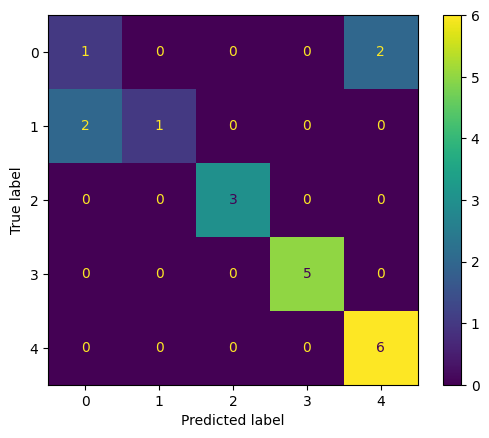

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_test_hat)
print(confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix)
# Dibujar el gráfico de la matriz de confusión
cm_display.plot()
# Mostrar el gráfico
plt.show()